In [1]:
%matplotlib inline

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [136]:
sns.set()

In [3]:
df = pd.read_csv('/Users/daviderickson/projects/datasf/data/Assessor_Historical_Secured_Property_Tax_Rolls.csv')

/Users/daviderickson/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.columns[25]

'Percent of Ownership'

In [5]:
df.dtypes

Closed Roll Year                    float64
Property Location                    object
Parcel Number                        object
Block                                object
Lot                                  object
Volume Number                         int64
Use Code                             object
Use Definition                       object
Property Class Code                  object
Property Class Code Definition       object
Year Property Built                 float64
Number of Bathrooms                 float64
Number of Bedrooms                    int64
Number of Rooms                       int64
Number of Stories                     int64
Number of Units                       int64
Zoning Code                          object
Construction Type                    object
Lot Depth                           float64
Lot Frontage                        float64
Property Area                         int64
Basement Area                       float64
Lot Area                        

In [6]:
df.shape

(2238147, 43)

In [7]:
df.head(5)

,Closed Roll Year,Property Location,Parcel Number,Block,Lot,Volume Number,Use Code,Use Definition,Property Class Code,Property Class Code Definition,...,Assessed Improvement Value,Assessed Land Value,Assessed Personal Property Value,Assessor Neighborhood District,Assessor Neighborhood Code,Assessor Neighborhood,Supervisor District,Analysis Neighborhood,the_geom,Row ID
0,2007.0,0000 0200 BRANNAN ST0436,3774412,3774,412,25,SRES,Single Family Residential,Z,Condominium,...,660074.0,660074.0,0.0,9.0,9H,South Beach,6,Financial District/South Beach,"(37.783600301443, -122.390711686202)",200701013774412
1,2016.0,0000 1207 INDIANA ST0004,4228041,4228,041,27,SRES,Single Family Residential,Z,Condominium,...,448902.0,448902.0,0.0,9.0,9E,Potrero Hill,10,Potrero Hill,"(37.75482032723, -122.390407823087)",201601014228041
2,2010.0,0000 0383 SITUS TO BE ASSIGNEDST0000,0041102,0041,102,1,COMR,Commercial Retail,C,Commercial Stores,...,643682.0,1396687.0,0.0,8.0,8D,North Beach,3,North Beach,"(37.805391366593, -122.413327689424)",201001010041102
3,2007.0,0000 0708 NORTH POINT STT 1,0024038,0024,038,1,SRES,Single Family Residential,Z,Condominium,...,365523.0,365523.0,0.0,8.0,8E,Russian Hill,2,Russian Hill,"(37.806098058572, -122.419076819471)",200701010024038
4,2016.0,0000 0188 MARY TERESA ST0000,5054A152,5054A,152,30,SRES,Single Family Residential,D,Dwelling,...,255843.0,383764.0,0.0,10.0,10K,Bayview Heights,10,Bayview Hunters Point,"(37.713888461234, -122.399170485325)",201601015054A152


In [8]:
df.describe()

,Closed Roll Year,Volume Number,Year Property Built,Number of Bathrooms,Number of Bedrooms,Number of Rooms,Number of Stories,Number of Units,Lot Depth,Lot Frontage,...,Tax Rate Area Code,Percent of Ownership,Misc Exemption Value,Homeowner Exemption Value,Assessed Fixtures Value,Assessed Improvement Value,Assessed Land Value,Assessed Personal Property Value,Assessor Neighborhood District,Supervisor District
count,2.238146e+06,2.238147e+06,2.064000e+06,2.238147e+06,2.238147e+06,2.238147e+06,2.238147e+06,2.238147e+06,2.238147e+06,2.238147e+06,...,2.232637e+06,2.238146e+06,2.238146e+06,2.238146e+06,2.238146e+06,2.238146e+06,2.238146e+06,2.238146e+06,2.237865e+06,2.238147e+06
mean,2.012061e+03,2.063252e+01,1.941636e+03,2.364135e+00,1.048956e+00,7.823049e+00,1.470800e+00,1.835442e+00,8.669454e+00,6.056058e-02,...,1.000725e+03,9.190668e-01,2.915795e+04,3.157840e+03,7.209944e+03,4.023147e+05,3.994016e+05,3.392403e+03,6.070209e+00,6.121937e+00
std,3.164951e+00,1.288068e+01,5.587058e+01,8.784859e+00,1.069431e+01,2.376514e+01,6.567046e+00,1.532557e+01,2.180097e+01,1.662870e+00,...,1.800430e+01,1.354783e+01,1.401633e+06,4.041963e+03,7.834920e+05,3.913785e+06,2.269509e+06,2.827261e+05,3.124298e+00,3.129490e+00
min,2.007000e+03,1.000000e+00,1.024000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,2.009000e+03,9.000000e+00,1.914000e+03,1.000000e+00,0.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.072400e+04,5.093500e+04,0.000000e+00,3.000000e+00,3.000000e+00
50%,2.012000e+03,1.900000e+01,1.935000e+03,1.000000e+00,0.000000e+00,6.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.867150e+05,1.966560e+05,0.000000e+00,7.000000e+00,6.000000e+00
75%,2.015000e+03,3.200000e+01,1.962000e+03,2.000000e+00,2.000000e+00,8.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+03,1.000000e+00,0.000000e+00,7.000000e+03,0.000000e+00,3.332948e+05,4.119580e+05,0.000000e+00,9.000000e+00,9.000000e+00
max,2.017000e+03,4.400000e+01,9.185000e+03,1.002000e+03,3.800000e+03,3.606000e+03,9.990000e+02,4.000000e+03,9.996000e+01,9.939000e+01,...,9.000000e+03,6.005000e+03,7.056831e+08,7.770000e+05,6.084663e+08,7.035785e+08,5.835724e+08,1.401327e+08,1.000000e+01,1.100000e+01


In [9]:
df.columns

Index(['Closed Roll Year', 'Property Location', 'Parcel Number', 'Block',
       'Lot', 'Volume Number', 'Use Code', 'Use Definition',
       'Property Class Code', 'Property Class Code Definition',
       'Year Property Built', 'Number of Bathrooms', 'Number of Bedrooms',
       'Number of Rooms', 'Number of Stories', 'Number of Units',
       'Zoning Code', 'Construction Type', 'Lot Depth', 'Lot Frontage',
       'Property Area', 'Basement Area', 'Lot Area', 'Lot Code',
       'Tax Rate Area Code', 'Percent of Ownership', 'Exemption Code',
       'Exemption Code Definition', 'Status Code', 'Misc Exemption Value',
       'Homeowner Exemption Value', 'Current Sales Date',
       'Assessed Fixtures Value', 'Assessed Improvement Value',
       'Assessed Land Value', 'Assessed Personal Property Value',
       'Assessor Neighborhood District', 'Assessor Neighborhood Code',
       'Assessor Neighborhood', 'Supervisor District', 'Analysis Neighborhood',
       'the_geom', 'Row ID'],
      dt

In [10]:
# Create two lists for the loop results to be placed
lat = []
lon = []

# For each row in a varible,
for row in df['the_geom']:
    # Try to,
    try:
        # Split the row by comma, convert to float, and append
        # everything before the comma to lat
        lon.append(float(row.split(',')[0].split('(')[1]))
        # Split the row by comma, convert to float, and append
        # everything after the comma to lon
        lat.append(float(row.split(',')[1].split(')')[0]))
    # But if you get an error
    except:
        # append a missing value to lat
        lat.append(np.NaN)
        # append a missing value to lon
        lon.append(np.NaN)

# Create two new columns from lat and lon
df['latitude'] = lat
df['longitude'] = lon

/Users/daviderickson/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/daviderickson/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


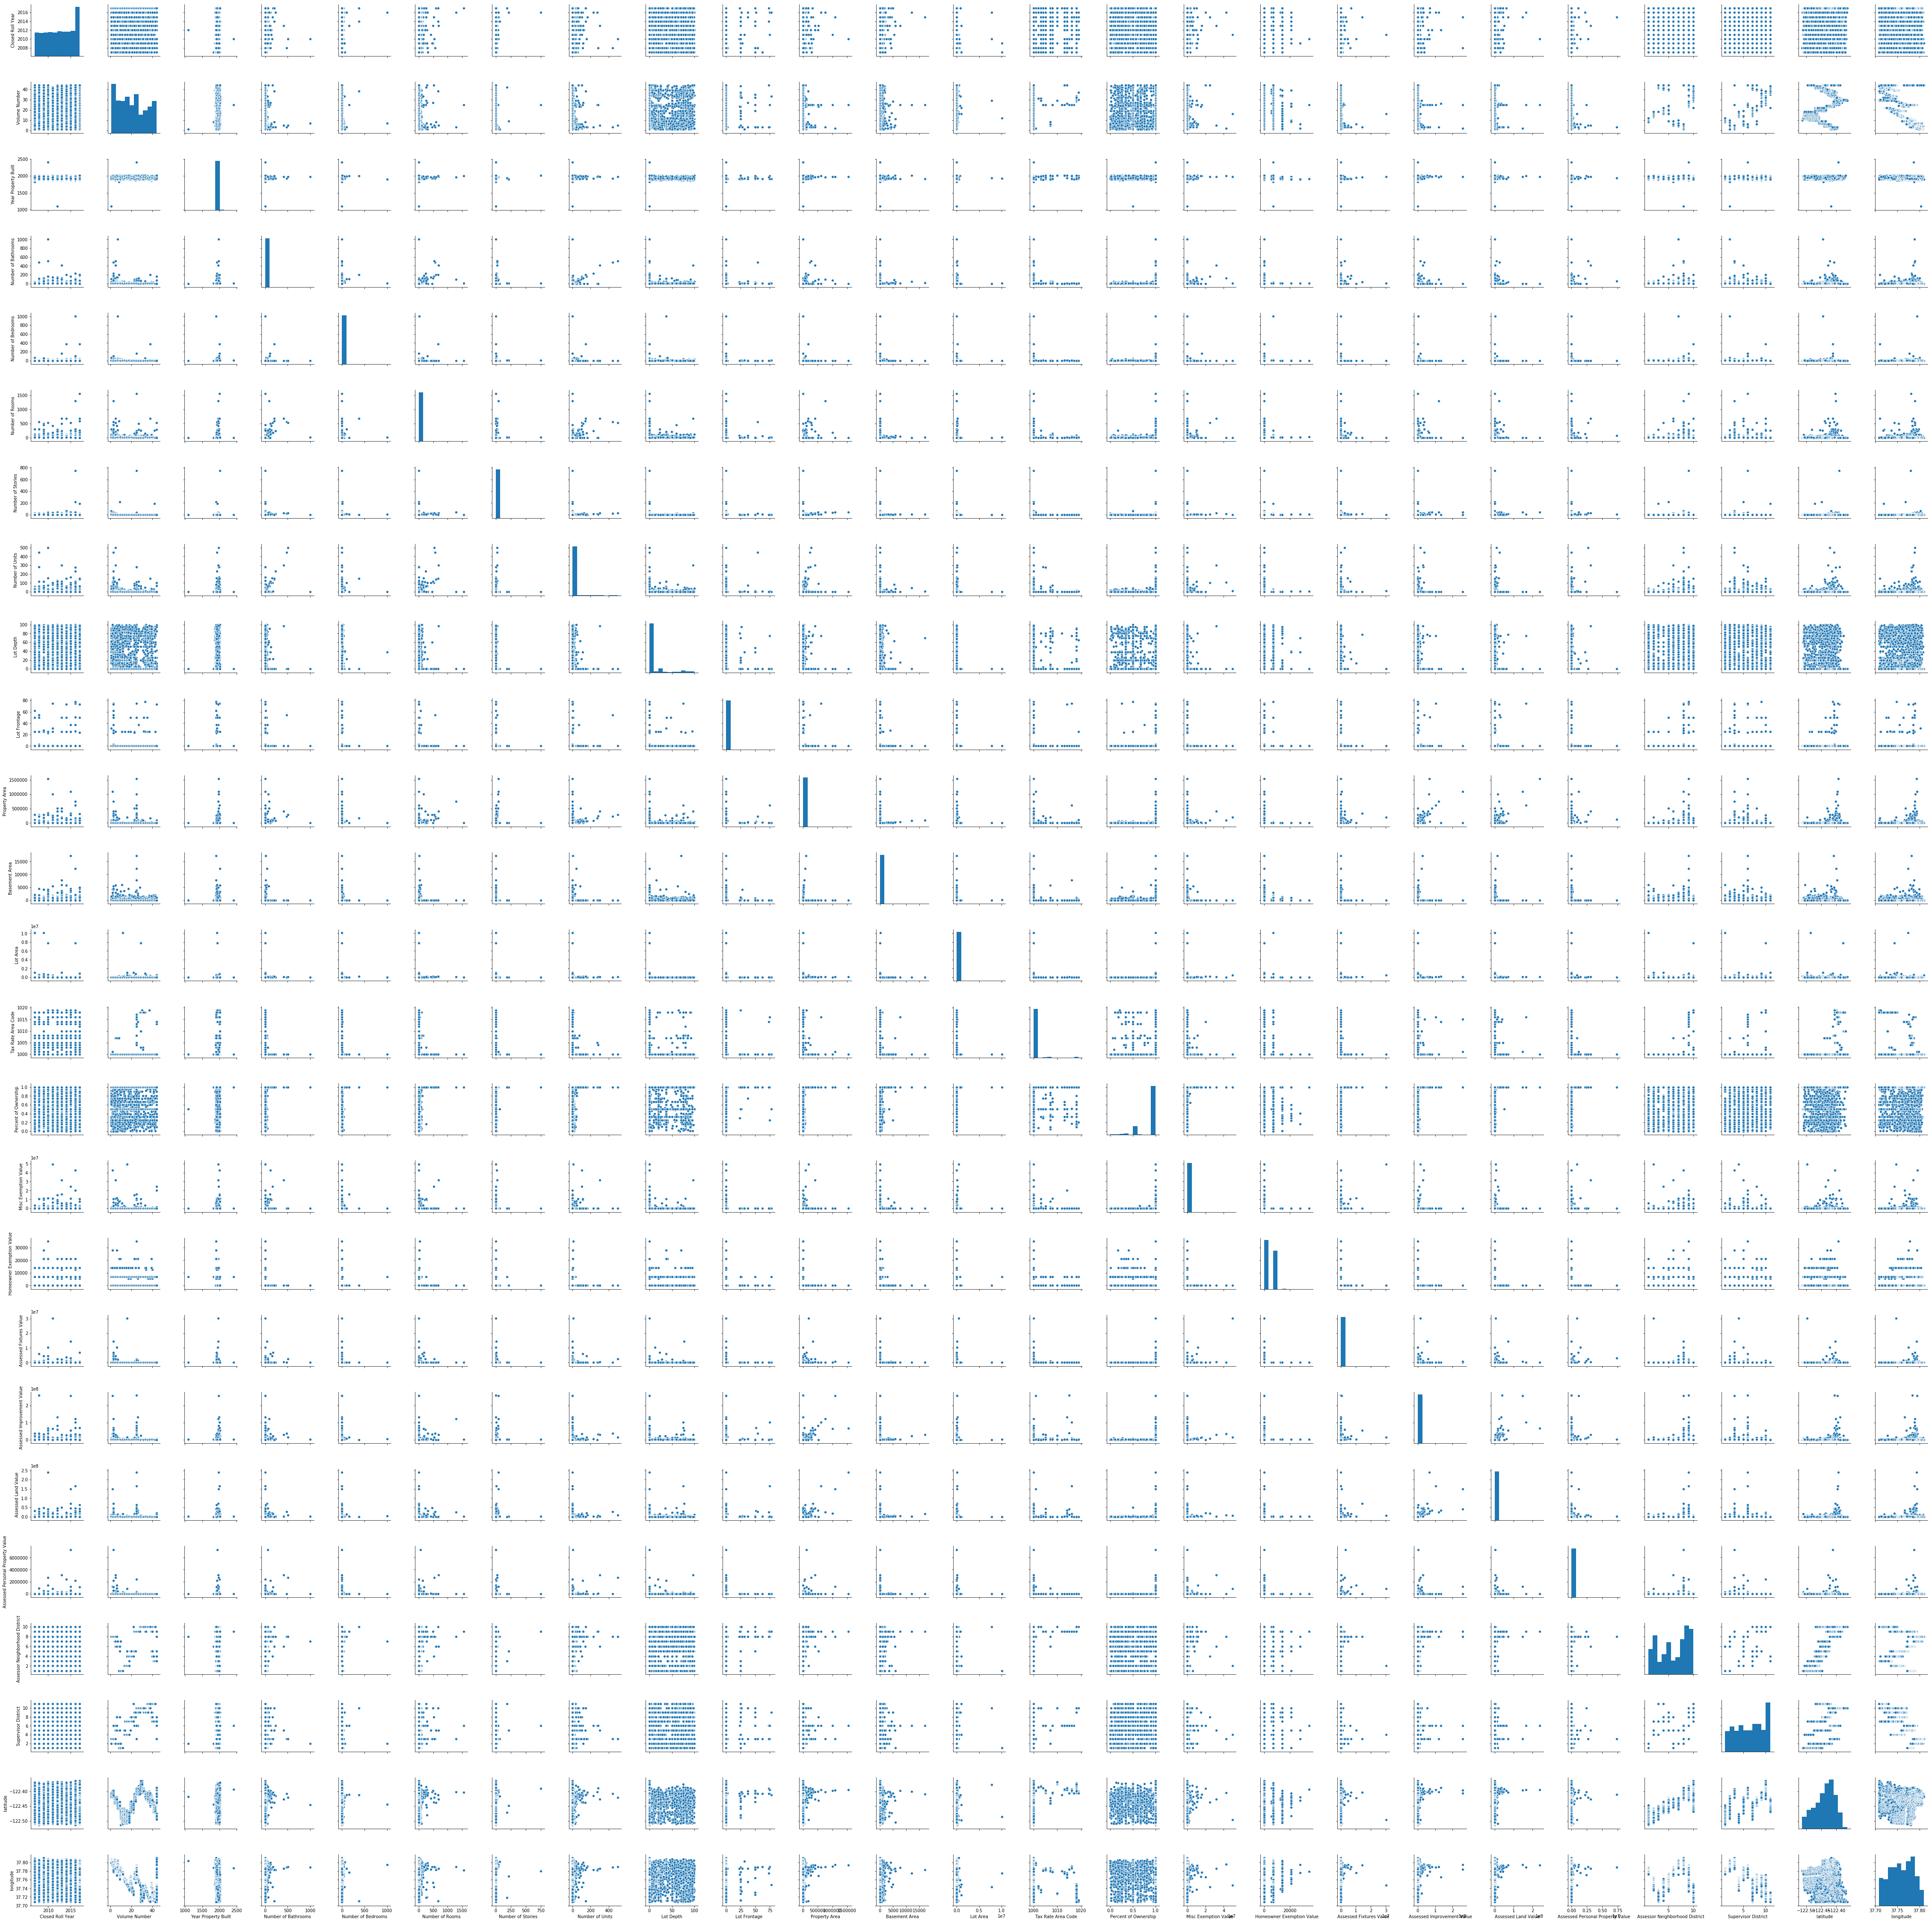

In [11]:
sns.pairplot(df[::100], kind='scatter')

(25, 25)


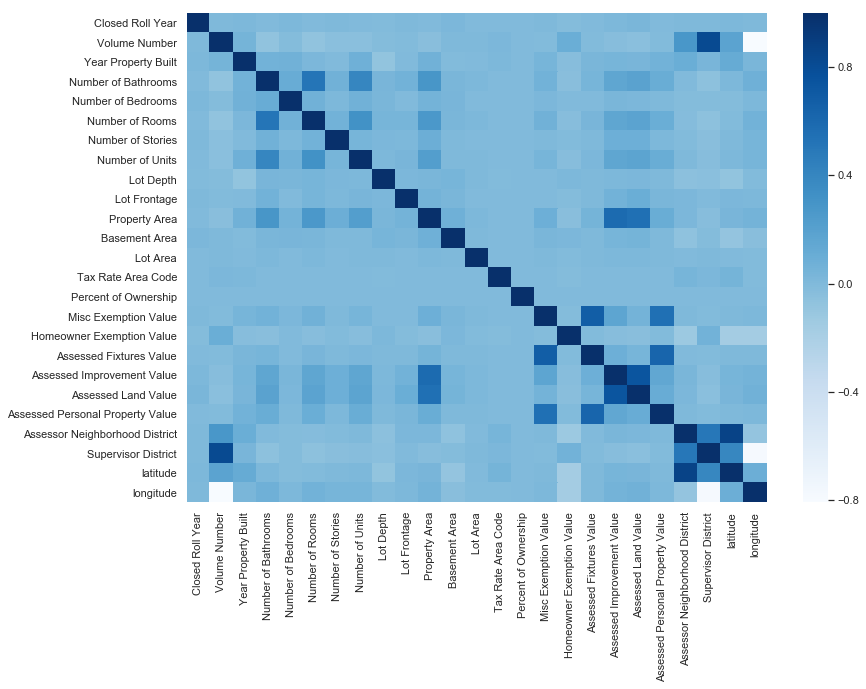

In [139]:
corr = df.corr()
print(corr.shape)
fig, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(corr, cmap='Blues')

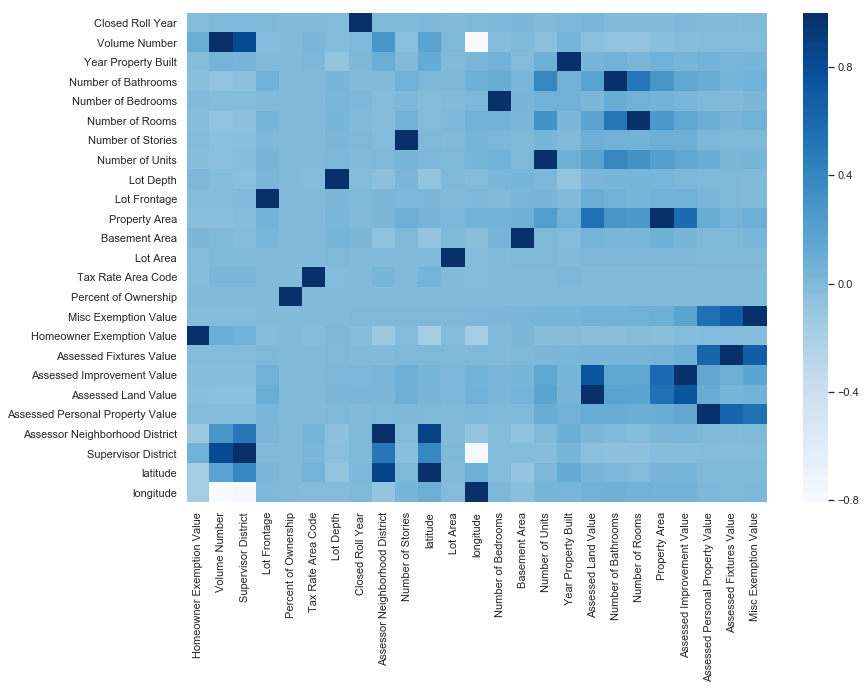

In [140]:
# display(corr.sort_values(by=['Assessed Personal Property Value']))
fig, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(corr.sort_values(by=['Misc Exemption Value'], axis=1), cmap='Blues')

In [41]:
for col in df.columns:
    match = re.search('Value', col)
    if match:
        print(col)

Misc Exemption Value
Homeowner Exemption Value
Assessed Fixtures Value
Assessed Improvement Value
Assessed Land Value
Assessed Personal Property Value


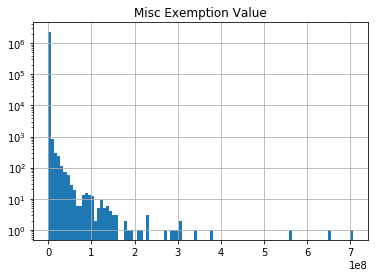

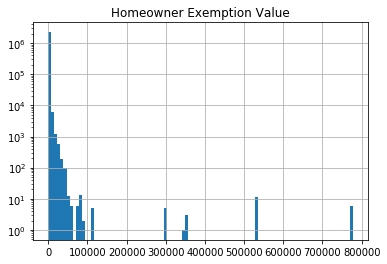

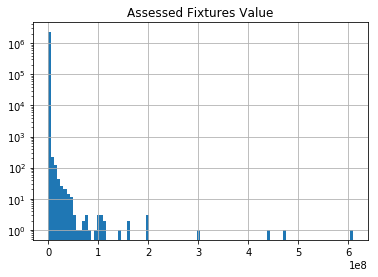

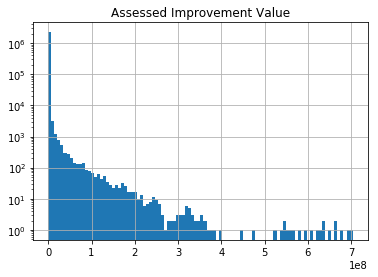

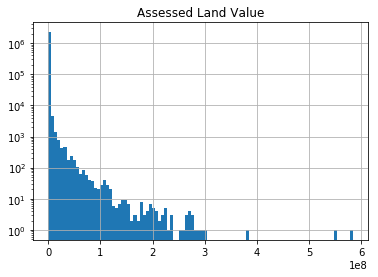

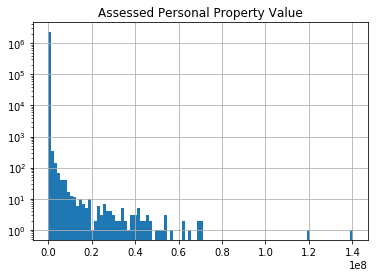

In [53]:
for col in df.columns:
    match = re.search('Value', col)
    if match:
        fig, ax = plt.subplots(figsize=(6, 4))
        df[col].hist(bins=100, log=True)
        ax.set_title(col)
        plt.show()
#         sns.distplot(df[col].dropna(), hist_kws={'log': True})
        plt.show()

In [22]:
df['Assessed Land Value'].describe()

count    2.238146e+06
mean     3.994016e+05
std      2.269509e+06
min      0.000000e+00
25%      5.093500e+04
50%      1.966560e+05
75%      4.119580e+05
max      5.835724e+08
Name: Assessed Land Value, dtype: float64

In [23]:
df['Closed Roll Year'].describe()

count    2.238146e+06
mean     2.012061e+03
std      3.164951e+00
min      2.007000e+03
25%      2.009000e+03
50%      2.012000e+03
75%      2.015000e+03
max      2.017000e+03
Name: Closed Roll Year, dtype: float64

In [24]:
df_groupby_nhood = df.groupby(by='Analysis Neighborhood').mean()

In [25]:
df_groupby_nhood.head()

,Closed Roll Year,Volume Number,Year Property Built,Number of Bathrooms,Number of Bedrooms,Number of Rooms,Number of Stories,Number of Units,Lot Depth,Lot Frontage,...,Misc Exemption Value,Homeowner Exemption Value,Assessed Fixtures Value,Assessed Improvement Value,Assessed Land Value,Assessed Personal Property Value,Assessor Neighborhood District,Supervisor District,latitude,longitude
Analysis Neighborhood,,,,,,,,,,,,,,,,,,,,,
Bayview Hunters Point,2012.115412,30.573240,1954.390809,1.430468,0.825309,4.785514,0.949438,0.901870,4.788595,0.061206,...,20147.900637,2500.375067,3232.613979,1.848966e+05,194842.564293,988.091794,9.974943,10.000000,-122.391053,37.728469
Bernal Heights,2012.018163,33.873737,1928.697692,1.622283,0.963739,6.130958,1.421408,1.214290,24.966979,0.125787,...,8700.166755,3660.577134,871.533120,1.992513e+05,233652.512622,718.568362,8.958734,8.960462,-122.415691,37.740517
Castro/Upper Market,2012.083478,21.047826,1928.370819,2.324171,0.909271,8.479299,1.715128,1.823466,6.554793,0.094287,...,10260.716014,3411.985109,1964.275594,3.394652e+05,421168.964318,511.733848,4.998844,8.000000,-122.435972,37.762216
Chinatown,2012.022899,1.987515,1934.773760,4.622873,0.496798,16.416650,2.618345,4.305841,12.836795,0.037001,...,120169.270651,1283.627660,31000.078595,1.284832e+06,985226.604890,13829.734588,8.000000,3.000000,-122.407802,37.795972
Excelsior,2012.003662,36.703389,1936.779750,1.529156,0.732952,6.075538,1.166961,1.103523,7.433125,0.047006,...,11576.864841,4119.776801,3556.041209,1.512944e+05,179716.883480,306.528692,9.999887,10.782732,-122.431931,37.719003


In [56]:
df_yr_nhood_appval = df.pivot_table(index='Closed Roll Year', columns='Analysis Neighborhood', values='Assessed Personal Property Value', aggfunc=np.mean)
df_yr_nhood_appval

Analysis Neighborhood,Bayview Hunters Point,Bernal Heights,Castro/Upper Market,Chinatown,Excelsior,Financial District/South Beach,Glen Park,Golden Gate Park,Haight Ashbury,Hayes Valley,...,Russian Hill,Seacliff,South of Market,Sunset/Parkside,Tenderloin,Treasure Island,Twin Peaks,Visitacion Valley,West of Twin Peaks,Western Addition
Closed Roll Year,,,,,,,,,,,,,,,,,,,,,
2007.0,1062.612929,3849.795037,92.548885,8212.953455,248.404800,15250.718990,90.123680,405.5,216.500000,1162.193589,...,1367.984244,21.662069,5343.735143,228.981940,17090.104684,0.0,574.536012,45.205479,265.539279,4773.189240
2008.0,947.263837,178.963111,114.193510,13937.170381,275.819102,14523.068832,147.962393,405.5,594.950989,1237.913230,...,671.217024,538.523973,5726.771944,228.840390,19287.153240,0.0,594.284668,18.496085,226.507634,4642.152203
2009.0,992.093371,201.118521,126.269822,13662.686121,389.175423,20559.181679,153.562394,405.5,637.160377,1773.877175,...,1007.178284,1061.521143,5890.900266,258.359090,22282.589776,0.0,545.879377,17.155004,249.401502,4451.886529
2010.0,890.490494,131.819203,130.295244,13744.691869,410.975474,15887.843092,145.217966,405.5,687.356030,1655.487446,...,943.163113,1107.398857,5348.811212,249.238846,20384.013065,0.0,443.885645,37.089336,242.919803,4180.479379
2011.0,594.586285,119.711367,111.232116,17430.007097,407.212008,12218.956773,213.674877,405.5,359.996455,392.038748,...,541.713890,999.770286,4821.704233,177.040823,19996.875533,0.0,458.514327,35.704964,145.361414,2607.902250
2012.0,742.068840,111.179651,107.534798,12143.535892,340.946992,10990.699604,157.543272,405.5,375.231504,573.739445,...,692.660597,977.568000,5472.840558,165.969615,20595.966106,0.0,461.549563,15.129185,143.269389,3922.571429
2013.0,1009.872608,139.262801,108.920289,12305.862703,335.279188,13239.026668,144.306604,405.5,722.577712,1246.104827,...,809.012222,972.348174,6334.117848,199.218625,23813.984700,0.0,347.779340,9.849051,195.644848,4321.476653
2014.0,1321.624522,117.330175,102.820898,12258.227337,286.656689,14249.599592,138.853387,405.5,738.538256,1242.601242,...,816.526378,944.997714,5896.230072,222.875907,23365.641154,0.0,368.131884,7.826172,191.860790,4182.751241
2015.0,1302.046277,115.490340,145.557104,14420.634561,253.597054,15362.871356,43.248065,405.5,719.962022,1192.069199,...,1019.384924,845.674286,9501.909354,191.020520,14360.765605,0.0,411.899517,7.022042,200.687597,2895.518393


In [57]:
# Plot above

In [63]:
df['Property Class Code Definition'].unique()

array(['Condominium', 'Commercial Stores', 'Dwelling',
       'Live/Work Condominium', 'Condominium BMR', 'Flats & Duplex',
       'Apartment', 'Coop Units Unsegregated',
       'Apartment 15 Units or more', 'Commercial Store Condo',
       'Coop Units Segregated', 'Flat & Store', 'Apartment 5 to 14 Units',
       'Parking Stall Condominium', 'Garages (Commercial)',
       'Condominium Economic Unit', 'Timeshare', 'Office - Condominium',
       'Industrial', 'Time Share Fractional', 'TI Apartment',
       'Town House', 'Apartmnt & Commercial Store', 'Town House BMR',
       'City Property', 'Office', '2 Dwellings on One Parcel',
       'Vacant Lot', 'Misc', 'Vacant Lot Comm and Ind',
       'PUD (Planned Unit Development)', 'Live/Work Condominium BMR',
       'Industrial Condominium', 'Hotels - Other',
       'Dwellings - Apartments', 'Hotel', 'Bank', 'Industial Warehouse',
       'Shopping Center', 'TI Flats & Duplex', 'Mixed use',
       'Clubs,Lodges,Fraternal Organizations', 'Schoo

In [93]:
list = df.dtypes==object
list = list.to_list()
print(np.sum(list), ' with dtype=object \n')
list #- 'Property Location'
# print(list)
print(df.loc[list].columns.to_list())
df.loc[list]

20  with dtype=object 

['Closed Roll Year', 'Property Location', 'Parcel Number', 'Block', 'Lot', 'Volume Number', 'Use Code', 'Use Definition', 'Property Class Code', 'Property Class Code Definition', 'Year Property Built', 'Number of Bathrooms', 'Number of Bedrooms', 'Number of Rooms', 'Number of Stories', 'Number of Units', 'Zoning Code', 'Construction Type', 'Lot Depth', 'Lot Frontage', 'Property Area', 'Basement Area', 'Lot Area', 'Lot Code', 'Tax Rate Area Code', 'Percent of Ownership', 'Exemption Code', 'Exemption Code Definition', 'Status Code', 'Misc Exemption Value', 'Homeowner Exemption Value', 'Current Sales Date', 'Assessed Fixtures Value', 'Assessed Improvement Value', 'Assessed Land Value', 'Assessed Personal Property Value', 'Assessor Neighborhood District', 'Assessor Neighborhood Code', 'Assessor Neighborhood', 'Supervisor District', 'Analysis Neighborhood', 'the_geom', 'Row ID', 'latitude', 'longitude']


,Closed Roll Year,Property Location,Parcel Number,Block,Lot,Volume Number,Use Code,Use Definition,Property Class Code,Property Class Code Definition,...,Assessed Personal Property Value,Assessor Neighborhood District,Assessor Neighborhood Code,Assessor Neighborhood,Supervisor District,Analysis Neighborhood,the_geom,Row ID,latitude,longitude
1,2016.0,0000 1207 INDIANA ST0004,4228041,4228,041,27,SRES,Single Family Residential,Z,Condominium,...,0.0,9.0,9E,Potrero Hill,10,Potrero Hill,"(37.75482032723, -122.390407823087)",201601014228041,-122.390408,37.754820
2,2010.0,0000 0383 SITUS TO BE ASSIGNEDST0000,0041102,0041,102,1,COMR,Commercial Retail,C,Commercial Stores,...,0.0,8.0,8D,North Beach,3,North Beach,"(37.805391366593, -122.413327689424)",201001010041102,-122.413328,37.805391
3,2007.0,0000 0708 NORTH POINT STT 1,0024038,0024,038,1,SRES,Single Family Residential,Z,Condominium,...,0.0,8.0,8E,Russian Hill,2,Russian Hill,"(37.806098058572, -122.419076819471)",200701010024038,-122.419077,37.806098
4,2016.0,0000 0188 MARY TERESA ST0000,5054A152,5054A,152,30,SRES,Single Family Residential,D,Dwelling,...,0.0,10.0,10K,Bayview Heights,10,Bayview Hunters Point,"(37.713888461234, -122.399170485325)",201601015054A152,-122.399170,37.713888
6,2015.0,0000 0199 NEW MONTGOMERY ST0601,3722136,3722,136,25,SRES,Single Family Residential,Z,Condominium,...,0.0,9.0,9B,Financial District South,6,Financial District/South Beach,"(37.786635167204, -122.39910415284)",201501013722136,-122.399104,37.786635
7,2015.0,0000 0555 04TH ST0520,3776244,3776,244,25,SRES,Single Family Residential,LZ,Live/Work Condominium,...,0.0,9.0,9D,Mission Bay,6,South of Market,"(37.779450061075, -122.396657157589)",201501013776244,-122.396657,37.779450
8,2008.0,0000 0175 BLUXOME ST0109,3785038,3785,038,25,SRES,Single Family Residential,Z,Condominium,...,0.0,9.0,9D,Mission Bay,6,Mission Bay,"(37.774378944514, -122.399574741848)",200801013785038,-122.399575,37.774379
9,2013.0,0000 2340 LARKIN #3 ST0000,0096057,0096,057,1,SRES,Single Family Residential,Z,Condominium,...,0.0,8.0,8E,Russian Hill,2,Russian Hill,"(37.799615061154, -122.420462975137)",201301010096057,-122.420463,37.799615
16,2007.0,0000 0000 0000,0024043,0024,043,1,SRES,Single Family Residential,Z,Condominium,...,0.0,8.0,8E,Russian Hill,2,Russian Hill,"(37.806110039385, -122.419564186435)",200701010024043,-122.419564,37.806110
17,2010.0,0000 0077 DOW PL0904,3750566,3750,566,25,SRES,Single Family Residential,Z,Condominium,...,0.0,9.0,9B,Financial District South,6,Financial District/South Beach,"(37.784158536175, -122.396570603604)",201001013750566,-122.396571,37.784159


In [94]:
df_exCode_nhood_appval = df.pivot_table(index='Exemption Code Definition', columns='Analysis Neighborhood', values='Assessed Personal Property Value', aggfunc=np.mean)
df_exCode_nhood_appval

Analysis Neighborhood,Bayview Hunters Point,Bernal Heights,Castro/Upper Market,Chinatown,Excelsior,Financial District/South Beach,Glen Park,Haight Ashbury,Hayes Valley,Inner Richmond,...,Presidio Heights,Russian Hill,Seacliff,South of Market,Sunset/Parkside,Tenderloin,Twin Peaks,Visitacion Valley,West of Twin Peaks,Western Addition
Exemption Code Definition,,,,,,,,,,,,,,,,,,,,,
Church,107.488095,0.000000e+00,0.000000e+00,256.034483,0.000000,0.000000e+00,NaN,0.000000,0.000000,25.290323,...,0.000000,0.000000,NaN,0.000000,509.493590,0.000000,NaN,0.000000,4829.482143,0.000000
College/University,15670.727273,0.000000e+00,0.000000e+00,0.000000,NaN,2.763895e+06,NaN,NaN,497482.315789,NaN,...,0.000000,661839.200000,NaN,866874.185185,0.000000,18596.440000,NaN,NaN,0.000000,0.000000
Home Owners,5.015740,2.690541e+01,5.198841e+01,67.602968,8.253766,1.452602e+01,11.993362,82.048280,58.593349,46.611721,...,70.856052,58.744467,3.859204,18.383482,10.218427,65.430181,20.138545,1.388246,9.547207,54.070124
Hospital,NaN,2.593747e+06,2.510323e+06,NaN,NaN,NaN,NaN,NaN,NaN,806269.333333,...,63305.787879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
Lessor,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN
Museum/Public Library,NaN,NaN,NaN,0.000000,NaN,2.610122e+05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,21004.181818,NaN,NaN,NaN,0.000000,0.000000,0.000000
Religious,90.212500,3.473485e+02,1.866750e+02,2560.471698,2210.641975,NaN,597.368421,2511.916667,0.000000,12352.197183,...,0.000000,0.000000,NaN,0.000000,5730.002747,325.068182,NaN,690.392857,8475.053140,2390.806818
School Exemption,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
Veterans,0.000000,0.000000e+00,0.000000e+00,NaN,0.000000,0.000000e+00,0.000000,15.384615,NaN,3.052632,...,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000


Exemption Code Definition
Church                   6.987043e+02
College/University       3.301151e+05
Home Owners              2.637198e+01
Hospital                 2.352424e+06
Lessor                   0.000000e+00
Museum/Public Library    5.513602e+04
Religious                3.163430e+03
School Exemption         5.728020e+03
Veterans                 7.036082e-01
Welfare                  1.636126e+05
Name: Assessed Personal Property Value, dtype: float64


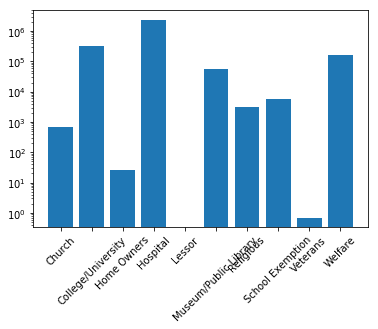

In [111]:
df_exCode_appval = df.groupby(by='Exemption Code Definition')['Assessed Personal Property Value'].mean()
print(df_exCode_appval)
fig, ax = plt.subplots(figsize=(6,4))
plt.bar(height=df_exCode_appval, x=df_exCode_appval.index)
plt.xticks(rotation=45)
ax.set_yscale('log')

Exemption Code Definition
Church                   5.677909e+05
College/University       3.134959e+06
Home Owners              0.000000e+00
Hospital                 1.618817e+07
Lessor                   2.564474e+07
Museum/Public Library    8.814812e+05
Religious                7.930222e+05
School Exemption         9.038503e+05
Veterans                 9.872374e+04
Welfare                  4.591763e+06
Name: Misc Exemption Value, dtype: float64


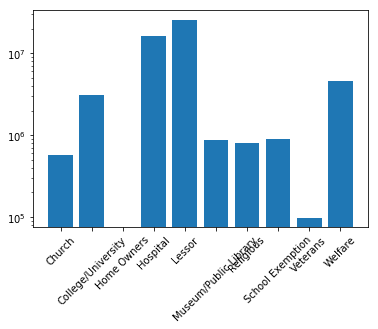

In [113]:
df_exCode_exVal = df.groupby(by='Exemption Code Definition')['Misc Exemption Value'].mean()
print(df_exCode_exVal)
fig, ax = plt.subplots(figsize=(6,4))
plt.bar(height=df_exCode_exVal, x=df_exCode_exVal.index)
plt.xticks(rotation=45)
ax.set_yscale('log')